#One Shot Learning with Siamese Networks

## Reading data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import feather

# path to the data directory
path = '/content/drive/My Drive/bciPatterns'
os.chdir(path)
#!ls
#os.listdir(path)

# number of groups (species, processes, ...)
n_classes = 130
# number of replicates (censuses, ...)
n_examples = 8

# rectangular observation window
xmin = 0
xmax = 1000
ymin = 0
ymax = 500
window = [[xmin, xmax], [ymin, ymax]]

# grid dimension
grid_nx = 512
grid_ny = 256

In [0]:
# dictionary with n_classs number of elements
species = ['swars1', 'hybapr',  'beilpe',  'faraoc',  'tet2pa',  'des2pa',  'crotbi',  'alsebl',  'ouralu',  'mourmy',  
           'ocotob',  'paligu',  'quaras',  'gustsu',  'pterro',  'virosu',  'simaam',  'protte',  'brosal',  'ingape',  
           'poular',  'casear',  'hirttr',  'ocotwh',  'guatdu',  'tri2tu',  'guarsp',  'guargu',  'tab1ro',  'sloate',  
           'alchco',  'loncla',  'luehse',  'tripcu',  'licapl',  'eugeco',  'heisco',  'eugene',  'pri2co',  'sponra',  
           'poutre',  'guapst',  'cordbi',  'zantbe',  'tab2ar',  'jac1co',  'zantp1',  'chr2ar',  'eugeoe',  'apeime',  
           'ingago',  'virose',  'pla1pi',  'drypst',  'casesy',  'pla2el',  'gar2in',  'cassel',  'calolo',  'cecrin',  
           'hassfl',  'ingama',  'allops',  'sympgl',  'guetfo',  'aspicr',  'andiin',  'ingas1',  'tropra',  'protpa',  
           'unonpi',  'maquco',  'gar2ma',  'randar',  'cordla',  'picrla',  'xyl1ma',  'perexa',  'sipapa',  'nectci',  
           'licahy',  'tachve',  'protco',  'laciag',  'celtsc',  'ade1tr',  'ingasa',  'ocotce',  'nectgl',  'swars2',
           'micoar',  'tri2pa',  'ocotpu',  'cupasy',  'ast1st',  'cou2cu',  'coccco',  'eugega',  'ingaqu',  'psycho',
           'acaldi',  'pentma',  'annoac',  'oenoma',  'psycma',  'taline',  'soroaf',  'talipr',  'malmsp',  'caseac',
           'olmeas',  'ingaum',  'rinosy',  'cappfr',  'stylst',  'ery2pa',  'herrpu',  'laetth',  'ery2ma',  'alibed',
           'chr1ec',  'coccma',  'quasam',  'socrex',  'pipere',  'bactma',  'micoaf',  'micone',  'cha2sc',  'anaxpa']

In [0]:
# read data files: each point pattern in a separate file 
bci_patterns = [None] * n_classes
filename = [None] * n_examples
for i in range(n_classes):
  bci_patterns[i] = [None] * n_examples
  for j in range(n_examples):
    filename[j] = species[i] + str(j + 1) + ".feather"
    df = feather.read_dataframe(filename[j])
    bci_patterns[i][j] = df

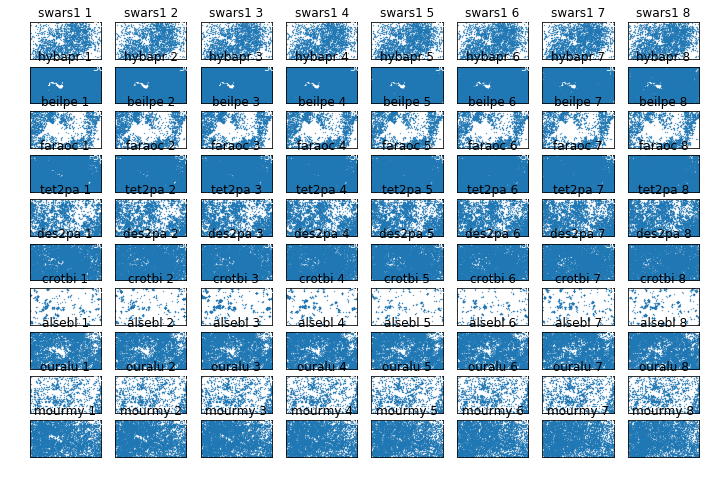

In [0]:
fig, axs = plt.subp" do not admit closed form expressions."ots(10, 8, figsize=(12, 8))

for i in range(10):
  for j in range(n_examples):
    axs[i, j].scatter(bci_patterns[i][j]['x'], bci_patterns[i][j]['y'], s=0.1)
    axs[i, j].set_title(species[i] + ' ' + str(j + 1))
    axs[i, j].set_xlim([0, 1])
    axs[i, j].set_ylim([0, 1])
    #axs[i, j].axis('off')
    axs[i, j].set_xticks(window[0])
    axs[i, j].set_yticks(window[1])
    axs[i, j].tick_params(axis='both', which='both',length=0, labelcolor='white')

fig.savefig('bcipatterns.pdf', bbox_inches='tight')

## Convert spatial point patterns to images (spatial counts)

In [0]:
def pattern2img(pp, nx, ny, window):
  x = pp['x']
  y = pp['y']
  grid = np.histogram2d(x, y, bins=[nx, ny], range=window, density=False)[0]
  return np.transpose(grid)

bci_imgs = [None] * n_classes
for i in range(n_classes):
  bci_imgs[i] = [None] * n_examples
  for j in range(n_examples):
    bci_imgs[i][j] = pattern2img(bci_patterns[i][j], grid_nx, grid_ny, window)

bci_imgs = np.asarray(bci_imgs)
print(bci_imgs.shape)

(130, 8, 256, 512)


In [0]:
print(bci_imgs.sum())
print(bci_imgs.mean())
print(bci_imgs.max())

1808725.0
0.013268727522629958
10.0


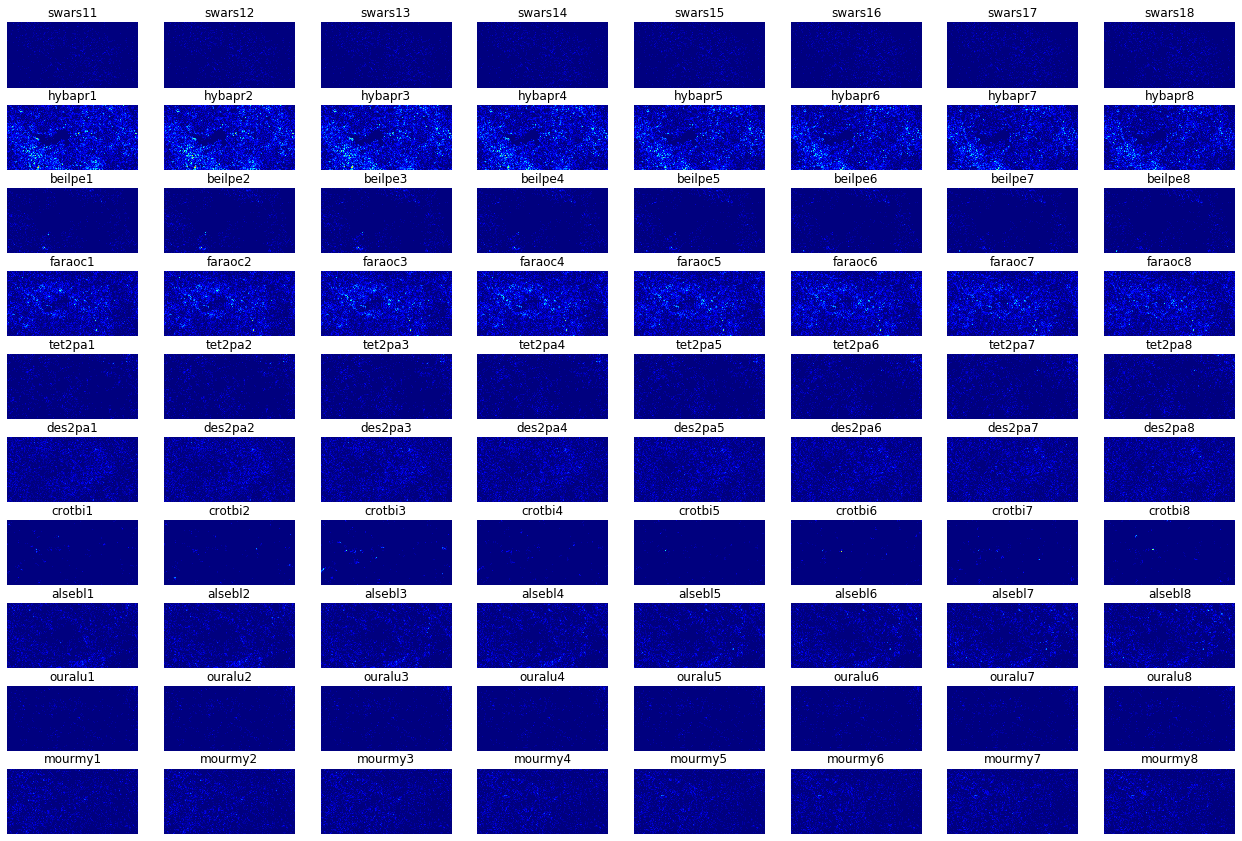

In [0]:
fig, axs = plt.subplots(10, 8, figsize=(22, 15))

for i in range(10):
  for j in range(n_examples):
    axs[i, j].imshow(bci_imgs[i][j], vmin=0, vmax=bci_imgs.max(), cmap='jet')
   # axs[i, j].scatter(bci_patterns[i][j]['x'] * grid_nx, 
   #                   bci_patterns[i][j]['y'] * grid_ny, s=0.15, color='red')
    axs[i, j].set_title(species[i] + str(j + 1))
    axs[i, j].axis('off')
#fig.savefig('simimgs.pdf', bbox_inches='tight')

In [0]:
print(np.sum(bci_imgs, axis=(2, 3)))

[[ 2257.  2494.  2733. ...  3069.  3191.  3267.]
 [39829. 42107. 42187. ... 32055. 30138. 28960.]
 [ 2375.  2782.  2982. ...  2373.  2252.  2119.]
 ...
 [  358.   317.   345. ...   295.   409.   442.]
 [  194.   243.   296. ...   471.   561.   600.]
 [  471.   485.   618. ...   829.   930.   940.]]


## Computing intensity and K functions with 'spatstat'

In [0]:
# install the R package spatstat
from rpy2.robjects.packages import importr
utils = importr('utils') #-- Only once.
utils.install_packages('spatstat')

In [0]:
import rpy2.robjects.packages as packages
# load spatstat
spatstat = importr('spatstat')
#from spatstat import *

import pandas as pd
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [0]:
import rpy2.robjects as robjects
W = spatstat.owin(xrange=robjects.vectors.FloatVector(window[0]), 
              yrange=robjects.vectors.FloatVector(window[1]))
dimyx = robjects.vectors.FloatVector([80, 160])

bci_rhos = [None] * n_classes
bci_Ks = [None] * n_classes
for i in range(n_classes):
  bci_rhos[i] = [None] * n_examples
  bci_Ks[i] = [None] * n_examples
  for j in range(n_examples):
    pp = spatstat.ppp(bci_patterns[i][j]['x'], bci_patterns[i][j]['y'], window=W)
    dd = spatstat.adaptive_density(pp, dimyx=dimyx)
    bci_rhos[i][j] = np.array(dd.rx2('v'))
    kk = spatstat.Kinhom(pp, dd, r=np.arange(0, 50, 0.25), correction='translation').rx2('trans')
    bci_Ks[i][j] = np.array(kk)
  print(i)

bci_rhos = np.asarray(bci_rhos)
bci_Ks = np.asarray(bci_Ks)

print(bci_rhos.shape)
print(bci_Ks.shape)

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
     PLEASE NOTE:  The components "delsgs" and "summary" of the
 object returned by deldir() are now DATA FRAMES rather than
 matrices (as they were prior to release 0.0-18).
 See help("deldir").
 
     PLEASE NOTE: The process that deldir() uses for determining
 duplicated points has changed from that used in version
 0.0-9 of this package (and previously). See help("deldir").



  warnings.warn(x, RRuntimeWarning)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
(130, 8, 80, 160)
(130, 8, 200)


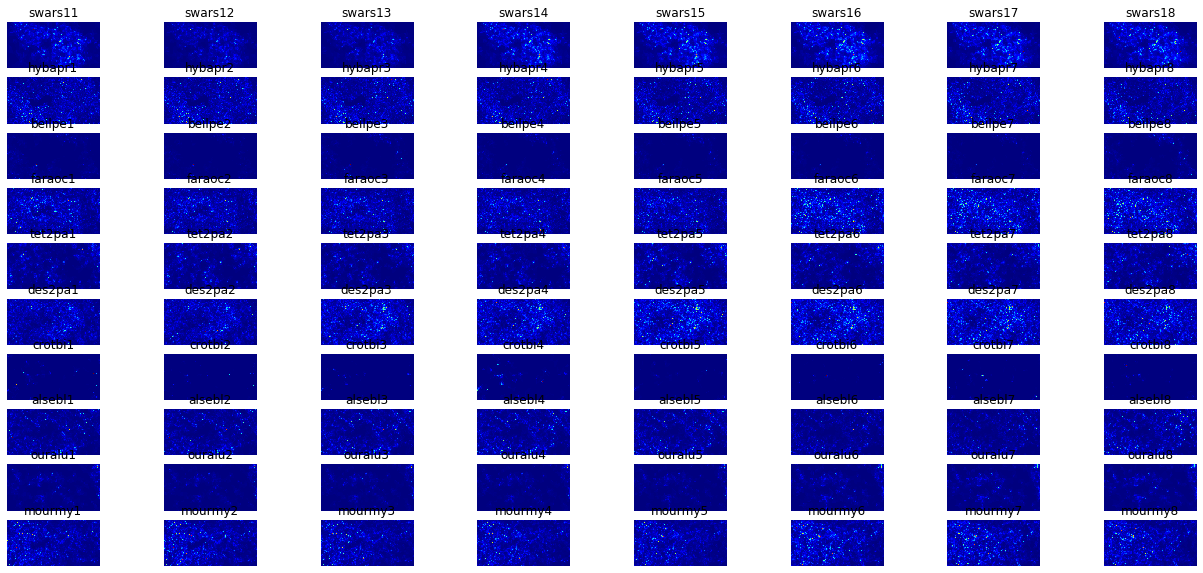

In [0]:
fig, axs = plt.subplots(10, 8, figsize=(22, 10))

for i in range(10):
  for j in range(n_examples):
    axs[i, j].imshow(bci_rhos[i][j],  cmap='jet')#, vmin=0, vmax=bci_rhos.max())
   # axs[i, j].scatter(bci_patterns[i][j]['x'] * 128, 
   #                   bci_patterns[i][j]['y'] * 128, s=1, color='red')
    axs[i, j].set_title(species[i] + str(j + 1))
    axs[i, j].axis('off')
#fig.savefig('simrhos.pdf', bbox_inches='tight')

## Prepare traning and validating sets

In [0]:
X = bci_imgs / bci_imgs.max()
print(X.shape)
y = []
for i in range(n_classes * n_examples *  grid_nx * grid_ny): 
  y.append(int(i / (n_examples * grid_nx * grid_ny)))
y = np.asarray(y)
y = y.reshape([n_classes * n_examples * grid_nx * grid_ny, 1])
print(y.shape)

(130, 8, 256, 512)
(136314880, 1)


In [0]:
import numpy.random as rng
n_test = 2

Xtrain = np.zeros([n_classes, n_examples - n_test, grid_ny, grid_nx])
Xval = np.zeros([n_classes, n_test, grid_ny, grid_nx])

for i in range(n_classes):
  val_idx = np.random.choice(n_examples, size=n_test, replace=False)
  Xtrain[i, :, :, :] = np.delete(X[i, :, :, :], val_idx, axis=0)
  Xval[i, :, :, :] = X[i, val_idx, :, :]

print(Xtrain.shape)
print(Xval.shape)

ytrain = []
for i in range(n_classes * (n_examples - n_test) *  grid_ny * grid_nx): 
  ytrain.append(int(i / ((n_examples - n_test) * grid_ny * grid_nx)))
ytrain = np.asarray(ytrain)
ytrain = ytrain.reshape([n_classes * (n_examples - n_test) * grid_ny * grid_nx, 1])
yval = []
for i in range(n_classes * n_test *  grid_ny * grid_nx): 
  yval.append(int(i / (n_test * grid_ny * grid_nx)))
yval = np.asarray(yval)
yval = yval.reshape([n_classes * n_test * grid_ny * grid_nx, 1])

print(ytrain.shape)
print(yval.shape)

(130, 6, 256, 512)
(130, 2, 256, 512)
(102236160, 1)
(34078720, 1)


In [0]:
def get_batch(batch_size, s = "train"):
    """
    Create batch of n pairs, half same class, half different class
    """
    if s == 'train':
        X = Xtrain
        categories = ytrain
    else:
        X = Xval
        categories = yval
    n_classes, n_examples, h, w = X.shape
    
    # randomly sample several classes to use in the batch
    categories = rng.choice(n_classes, size=(batch_size,), replace=False)
    
    # initialize 2 empty arrays for the input image batch
    pairs=[np.zeros((batch_size, h, w, 1)) for i in range(2)]
    
    # initialize vector for the targets
    targets=np.zeros((batch_size,))
    
    # make one half of it '1's, so 2nd half of batch has same class
    targets[batch_size // 2:] = 1
    for i in range(batch_size):
        category = categories[i]
        idx_1 = rng.randint(0, n_examples)
        pairs[0][i, :, :, :] = X[category, idx_1].reshape(h, w, 1)
        idx_2 = rng.randint(0, n_examples)
        
        # pick images of same class for 1st half, different for 2nd
        if i >= batch_size // 2:
            category_2 = category  
        else: 
            # add a random number to the category modulo n classes to ensure 2nd image has a different category
            category_2 = (category + rng.randint(1, n_classes)) % n_classes
        
        pairs[1][i, :, :, :] = X[category_2, idx_2].reshape(h, w, 1)
    
    return pairs, targets

In [0]:
def generate(batch_size, s="train"):
    """
    a generator for batches, so model.fit_generator can be used.
    """
    while True:
        pairs, targets = get_batch(batch_size, s)
        yield (pairs, targets)

## Siamese network

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Lambda, Dense, Flatten,MaxPooling2D, concatenate, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.constraints import Constraint
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adadelta
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
def make_oneshot_task(N, s="val"):
    """Create pairs of test image, support set for testing N way one-shot learning. """
    if s == 'train':
        X = Xtrain
        categories = ytrain
    else:
        X = Xval
        categories = yval
    n_classes, n_examples, h, w = X.shape
    
    categories = rng.choice(range(n_classes), size=(N,), replace=False)            
    indices = rng.randint(0, n_examples, size=(N,))
    
    true_category = categories[0]
    ex1, ex2 = rng.choice(n_examples, replace=False, size=(2,))
    test_image = np.asarray([X[true_category, ex1,:,:]] * N).reshape(N, h, w, 1)
    indices[0] = ex2
    support_set = X[categories, indices, :, :]
    #support_set[0, :, :] = X[true_category, ex2]
    support_set = support_set.reshape(N, h, w, 1)
    targets = np.zeros((N,))
    targets[0] = 1
   # targets, test_image, support_set = shuffle(targets, test_image, support_set)
    pairs = [test_image, support_set]
    ## aj
    cat = categories
    ind = [ex1, indices]
    ## aj
    return pairs, targets, cat, ind

  
def test_oneshot(model, N, k, s = "val", verbose = 0):
    """Test average N way oneshot learning accuracy of a siamese neural net over k one-shot tasks"""
    n_correct = 0
    if verbose:
        print("Evaluating model on {} random {} way one-shot learning tasks ... \n".format(k, N))
    for i in range(k):
        inputs, targets, __, __ = make_oneshot_task(N, s)
        probs = model.predict(inputs)
        if np.argmax(probs) == np.argmax(targets):
            n_correct += 1
    percent_correct = (100.0 * n_correct / k)
    if verbose:
        print("Got an average of {}% {} way one-shot learning accuracy \n".format(percent_correct,N))
    return percent_correct

In [0]:
def get_siamese_model(input_shape):
    """
        Model architecture
    """
    
    # Define the tensors for the two input images
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    
    # Convolutional Neural Network
    model = Sequential()
    model.add(Dropout(rate=0.1))
    model.add(Conv2D(filters=32, kernel_size=(10, 20), strides=1, 
                     padding='valid', activation='relu', input_shape=input_shape,
                     kernel_regularizer=l2(1e-4), #bias_regularizer=l2(1e-2),
                     bias_initializer='zeros', kernel_initializer='glorot_uniform'
                     ))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
    model.add(Dropout(rate=0.1))
    model.add(Conv2D(filters=64, kernel_size=(7, 14), strides=1, 
                     padding='valid', activation='relu', 
                     kernel_regularizer=l2(1e-4), #bias_regularizer=l2(1e-2),
                     bias_initializer='zeros', kernel_initializer='glorot_uniform'
                     ))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
    model.add(Conv2D(filters=64, kernel_size=(4, 8), strides=1, 
                     padding='valid', activation='relu', 
                     kernel_regularizer=l2(1e-4), #bias_regularizer=l2(1e-2),
                     bias_initializer='zeros', kernel_initializer='glorot_uniform'
                     ))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
    model.add(Conv2D(filters=128, kernel_size=(4, 8), strides=1, 
                     padding='valid', activation='relu', 
                     kernel_regularizer=l2(1e-4), #bias_regularizer=l2(1e-2),
                     bias_initializer='zeros', kernel_initializer='glorot_uniform'
                     ))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
    model.add(Flatten())
    model.add(Dense(2048, activation='sigmoid', use_bias=True,
                    kernel_regularizer=l2(1e-3)
                    ))
    
    # Generate the encodings (feature vectors) for the two images
    encoded_l = model(left_input)
    encoded_r = model(right_input)
    
    # Add a customized layer to compute the absolute difference between the encodings
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])
    
    # Add a dense layer with a sigmoid unit to generate the similarity score
    prediction = Dense(1, activation='sigmoid')(L1_distance)#, bias_initializer=initialize_bias)(L1_distance)
    
    # Connect the inputs with the outputs
    siamese_net = Model(inputs=[left_input, right_input], outputs=prediction)
    
    # return the model
    return siamese_net

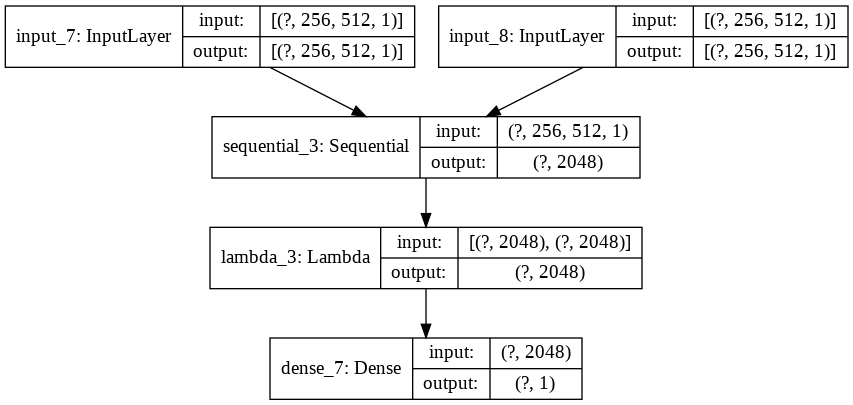

In [0]:
input_shape = (grid_ny, grid_nx, 1)
model = get_siamese_model(input_shape)
plot_model(model, show_shapes=True, show_layer_names=True)

In [0]:
optimizer =Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="binary_crossentropy", optimizer=optimizer)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 256, 512, 1) 0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 256, 512, 1) 0                                            
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 2048)         72954400    input_7[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 2048)         0           sequential_3[0][0]         

In [0]:
def reset_weights(model):
    for layer in model.layers: 
        if hasattr(layer, 'bias_initializer'):
            layer.bias.initializer.run(session=K.get_session())
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=K.get_session())
reset_weights(model)
# model.get_weights()

In [0]:
import time

model_path = './weights/'

# Hyper parameters
evaluate_every = 50 # interval for evaluating on one-shot tasks
batch_size = 32
n_iter = 1000 #20000 # No. of training iterations
N_way = 20 # how many classes for testing one-shot tasks
n_val = 250 # how many one-shot tasks to validate on
best = -1

loss = np.zeros(n_iter)
val_acc, train_acc = [], []
val_index = 0
print("Starting training process!")
print("-------------------------------------")
t_start = time.time()
for i in range(n_iter):
    (inputs, targets) = get_batch(batch_size)
    loss[i] = model.train_on_batch(inputs, targets)
    #if (i + 1) % 2 == 0:
    K.set_value(model.optimizer.lr, K.get_value(model.optimizer.lr) * 0.99)
    if (i + 1) % evaluate_every == 0:
        print("\n ------------- \n")
        print("Time for {0} iterations: {1} mins".format(i + 1, (time.time() - t_start)/60.0))
        print("Train Loss: {0}".format(loss[i]))
        print("Learning Rate: {0}".format(K.eval(model.optimizer.lr)))
        val_acc.append(test_oneshot(model, N_way, n_val, verbose=True))
        train_acc.append(test_oneshot(model, N_way, n_val, s='train', verbose=True))
        #model.save_weights(os.path.join(model_path, 'weights.{}.h5'.format(i)))
        if val_acc[val_index] >= best:
            print("Current best: {0}, previous best: {1}".format(val_acc[val_index], best))
            best = val_acc[val_index]
        val_index += 1

val_acc = np.array(val_acc)

Starting training process!
-------------------------------------

 ------------- 

Time for 50 iterations: 0.46053354342778524 mins
Train Loss: 0.5531383752822876
Learning Rate: 0.0006050062365829945
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 63.2% 20 way one-shot learning accuracy 

Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 67.2% 20 way one-shot learning accuracy 

Current best: 63.2, previous best: -1

 ------------- 

Time for 100 iterations: 1.6357112924257915 mins
Train Loss: 0.5470753908157349
Learning Rate: 0.00036603244370780885
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 68.4% 20 way one-shot learning accuracy 

Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 70.0% 20 way one-shot learning accuracy 

Current best: 68.4, previous best: 63.2

 ------------- 

Time for 150 iterations: 2.804682556788127 mins
Train Lo

0.1679462194442749
4.584150314331055


4.3171234e-08

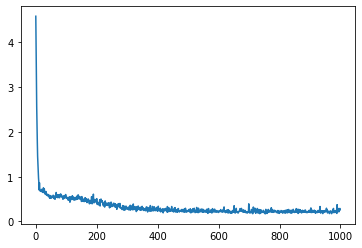

In [0]:
plt.plot(loss)
print(loss.min())
print(loss.max())
K.eval(model.optimizer.lr)

96.8


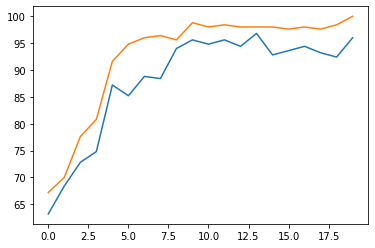

In [0]:
plt.plot(val_acc, label='valid')
plt.plot(train_acc, label='train')
print(best)

In [0]:
print(targets)
print(model.predict_on_batch(inputs))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
[[1.2822747e-03]
 [2.4678612e-01]
 [8.8125467e-04]
 [5.4292679e-03]
 [8.9287758e-05]
 [9.7990036e-05]
 [1.7548719e-01]
 [1.5666604e-02]
 [9.7113848e-04]
 [1.3411045e-06]
 [2.9474497e-05]
 [4.5102835e-04]
 [1.8752903e-01]
 [7.1394444e-04]
 [8.9809239e-02]
 [6.3244963e-01]
 [9.4739240e-01]
 [8.3546424e-01]
 [9.9134058e-01]
 [7.2999775e-01]
 [5.2226382e-01]
 [9.1293979e-01]
 [9.2620236e-01]
 [9.6775824e-01]
 [5.2226382e-01]
 [8.0042958e-01]
 [9.3398261e-01]
 [5.2226382e-01]
 [5.2226382e-01]
 [9.4346809e-01]
 [9.7390974e-01]
 [9.9531651e-01]]


In [0]:
(inputs, targets) = get_batch(batch_size, s='val')
print(targets)
print(model.predict_on_batch(inputs))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
[[3.3935606e-03]
 [2.3226678e-02]
 [3.2661885e-02]
 [1.9698530e-02]
 [2.5682020e-01]
 [2.6894212e-03]
 [5.4097176e-04]
 [4.7683716e-06]
 [2.9067874e-02]
 [2.2584200e-04]
 [1.0848153e-01]
 [1.4869422e-01]
 [1.9667590e-01]
 [1.8883902e-01]
 [3.6507845e-05]
 [4.4862390e-02]
 [5.2226382e-01]
 [7.3185384e-01]
 [9.6797907e-01]
 [5.2226382e-01]
 [5.2226382e-01]
 [5.2226382e-01]
 [7.1951479e-01]
 [9.1628671e-01]
 [5.2226382e-01]
 [9.5043433e-01]
 [9.5734328e-01]
 [5.2226382e-01]
 [5.2226382e-01]
 [5.2226382e-01]
 [7.9761243e-01]
 [5.2226382e-01]]


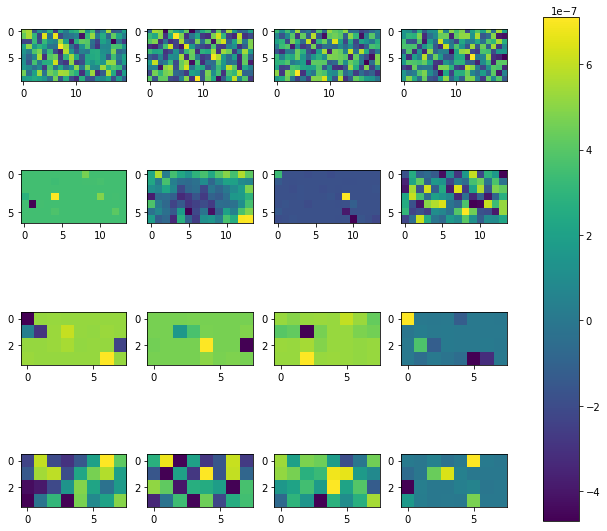

In [0]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i in range(4):
  for j in range(4):
    im=axs[i, j].imshow(model.layers[2].get_weights()[2 * i][:, :, 0, j])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.show()

<BarContainer object of 2048 artists>

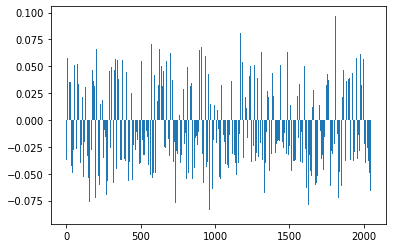

In [0]:
plt.bar(np.arange(model.layers[4].get_weights()[0].shape[0]), model.layers[4].get_weights()[0][:,0])

## Compare with nearest neighbur, intensity and K distance methods

In [0]:
def nearest_neighbour_correct(pairs, targets):
    """returns 1 if nearest neighbour gets the correct answer for a one-shot task
        given by (pairs, targets)"""
    L2_distances = np.zeros_like(targets)
    for i in range(len(targets)):
        L2_distances[i] = np.sum(np.sqrt((pairs[0][i] - pairs[1][i])**2))
    if np.argmin(L2_distances) == np.argmax(targets):
        return 1
    return 0

def test_nn_accuracy(N_ways, n_trials):
    """Returns accuracy of NN approach """
    print("Evaluating nearest neighbour on {} unique {} way one-shot learning tasks ...".format(n_trials,N_ways))

    n_right = 0
    for i in range(n_trials):
        pairs, targets, __, __ = make_oneshot_task(N_ways,"val")
        correct = nearest_neighbour_correct(pairs,targets)
        n_right += correct
    return 100.0 * n_right / n_trials

In [0]:
def intensity_distance_correct(targets, cats, inds):
    """returns 1 if intensity distance gets the correct answer for a one-shot task
        given by (pairs, targets)"""
    rho_distances = np.zeros(len(cats))
    for i in range(len(cats)):
        rho_distances[i] = np.sum((bci_rhos[cats[0]][inds[0]] - bci_rhos[cats[i]][inds[1][i]])**2)
    if np.argmin(rho_distances) == np.argmax(targets):
        return 1
    return 0

def test_id_accuracy(N_ways, n_trials):
    """Returns accuracy of NN approach """
    print("Evaluating intensity distance on {} unique {} way one-shot learning tasks ...".format(n_trials, N_ways))

    n_right = 0
    
    for i in range(n_trials):
        __, targets, cat, ind = make_oneshot_task(N_ways,"val")
        correct = intensity_distance_correct(targets, cat, ind)
        n_right += correct
    return 100.0 * n_right / n_trials

In [0]:
def Kfun_distance_correct(targets, cats, inds):
    """returns 1 if intensity distance gets the correct answer for a one-shot task
        given by (pairs, targets)"""
    K_dists = np.zeros(len(cats))
    for i in range(len(cats)):
        K_dists[i] = np.sum((bci_Ks[cats[0], inds[0], :] - bci_Ks[cats[i], inds[1][i], :])**2)
    if np.argmin(K_dists) == np.argmax(targets):
        return 1
    return 0

def test_Kf_accuracy(N_ways, n_trials):
    """Returns accuracy of NN approach """
    print("Evaluating K function distance on {} unique {} way one-shot learning tasks ...".format(n_trials, N_ways))

    n_right = 0
    
    for i in range(n_trials):
        __, targets, cat, ind = make_oneshot_task(N_ways,"val")
        correct = Kfun_distance_correct(targets, cat, ind)
        n_right += correct
    return 100.0 * n_right / n_trials

In [0]:
ways = np.arange(2, 31, 2)
resume =  False
trials = 500

val_accs, train_accs, nn_accs, id_accs, kf_accs = [], [], [], [], []
for N in ways:    
    val_accs.append(test_oneshot(model, N, trials, "val", verbose=True))
    train_accs.append(test_oneshot(model, N, trials, "train", verbose=True))
    nn_acc = test_nn_accuracy(N, trials)
    nn_accs.append(nn_acc)
    id_acc = test_id_accuracy(N, trials)
    id_accs.append(id_acc)
    kf_acc = test_Kf_accuracy(N, trials)
    kf_accs.append(kf_acc)
    print ("NN Accuracy = ", nn_acc)
    print ("ID Accuracy = ", id_acc)
    print ("KF Accuracy = ", kf_acc)
    print("---------------------------------------------------------------------------------------------------------------")


Evaluating model on 500 random 2 way one-shot learning tasks ... 

Got an average of 100.0% 2 way one-shot learning accuracy 

Evaluating model on 500 random 2 way one-shot learning tasks ... 

Got an average of 100.0% 2 way one-shot learning accuracy 

Evaluating nearest neighbour on 500 unique 2 way one-shot learning tasks ...
Evaluating intensity distance on 500 unique 2 way one-shot learning tasks ...
Evaluating K function distance on 500 unique 2 way one-shot learning tasks ...
NN Accuracy =  94.6
ID Accuracy =  98.0
KF Accuracy =  92.4
---------------------------------------------------------------------------------------------------------------
Evaluating model on 500 random 4 way one-shot learning tasks ... 

Got an average of 99.0% 4 way one-shot learning accuracy 

Evaluating model on 500 random 4 way one-shot learning tasks ... 

Got an average of 99.8% 4 way one-shot learning accuracy 

Evaluating nearest neighbour on 500 unique 4 way one-shot learning tasks ...
Evaluating 

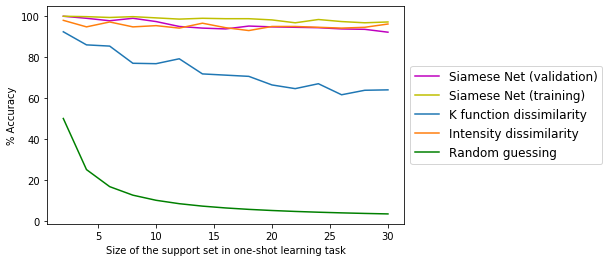

In [0]:
fig, ax = plt.subplots(1, figsize=(8, 4))
ax.plot(ways, val_accs, "m", label="Siamese Net (validation)")
ax.plot(ways, train_accs, "y", label="Siamese Net (training)")
#plt.plot(ways, nn_accs, label="Nearest neighbour")
plt.plot(ways, kf_accs, label="K function dissimilarity")
plt.plot(ways, id_accs, label="Intensity dissimilarity")

ax.plot(ways, 100.0/ways, "g", label="Random guessing")
plt.xlabel("Size of the support set in one-shot learning task")
plt.ylabel("% Accuracy")
#plt.title("One-Shot Learning Performance for\nSimulated Point Patterns from 10 Processes", 
#          fontsize=15)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

fig.savefig('bciaccuracy.pdf', bbox_inches='tight')

##Confusion matrix

In [0]:
import seaborn as sn
from scipy.cluster.hierarchy import dendrogram, linkage

In [0]:
pairs = [None] * 2
res1 = np.zeros((n_classes, n_classes))
for i in range(n_classes):
  for j in range(i, n_classes):
    tmp = []
    for k in range(n_examples):
      for l in range(n_examples):
        if ((i != j) or (k != l)):
          pairs[0] =  X[i, k, :, :].reshape(1, grid_ny, grid_nx, 1)
          pairs[1] =  X[j, l, :, :].reshape(1, grid_ny, grid_nx, 1)
          tmp.append(model.predict(pairs))
    tmp = np.asarray(tmp)
    res1[i, j] = res1[j, i] = tmp.mean()

#print(res1)
res1 = pd.DataFrame(res1, index = species, columns = species)

In [0]:
plt.figure(figsize = (8, 6))
svm = sn.heatmap(1 - res1, annot=True)
fig = svm.get_figure()
#fig.savefig('bcicnnconfusion.pdf', bbox_inches='tight')

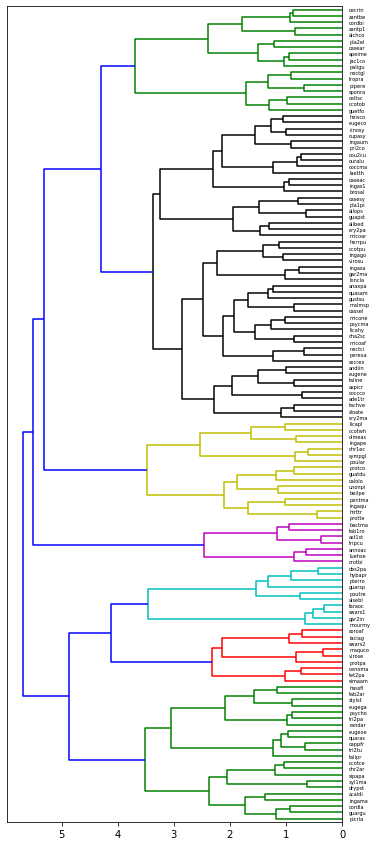

In [0]:
linked = linkage(1 - res1, method='ward')
fig = plt.figure(figsize=(6, 15))
dendrogram(linked, orientation='left', labels=species,
            distance_sort='descending', show_leaf_counts=True)
plt.show()
fig.savefig('bcihc1.pdf', bbox_inches='tight')
plt.close()

In [0]:
res2 = np.zeros((n_classes, n_classes))
for i in range(n_classes):
  for j in range(i, n_classes):
    tmp = []
    for k in range(n_examples):
      for l in range(k, n_examples):
        if ((i != j) or (k != l)):
          tmp.append(np.mean((bci_rhos[i, k, :] - bci_rhos[j, l, :])**2))
    tmp = np.asarray(tmp)
    res2[i, j] = res2[j, i] =  tmp.mean()

#print(res2)
res2 = pd.DataFrame(res2, index = species, columns = species)

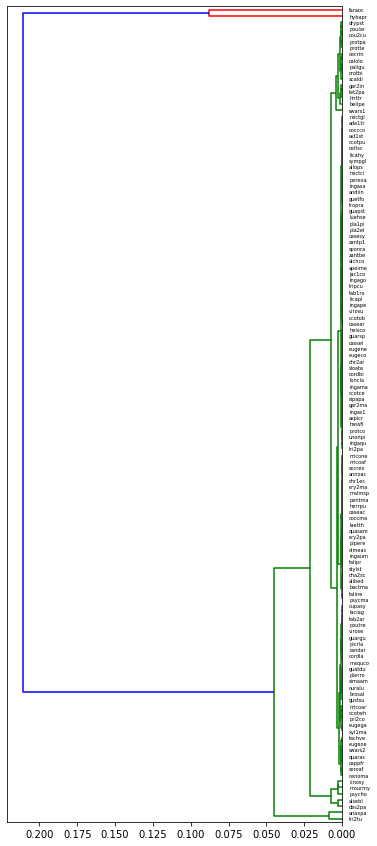

In [0]:
linked = linkage(res2, 'ward')
fig = plt.figure(figsize=(6, 15))
dendrogram(linked, orientation='left', labels=species,
            distance_sort='descending', show_leaf_counts=True)
plt.show()
fig.savefig('bcihc2.pdf', bbox_inches='tight')
plt.close()

In [0]:
np.sort(bci_imgs.sum(axis=(1, 2, 3)))

array([   910.,   1077.,   1102.,   1104.,   1105.,   1117.,   1190.,
         1343.,   1352.,   1359.,   1391.,   1412.,   1470.,   1499.,
         1502.,   1546.,   1661.,   1757.,   1758.,   1764.,   1765.,
         1777.,   1826.,   1851.,   1911.,   1965.,   2043.,   2231.,
         2250.,   2257.,   2413.,   2422.,   2451.,   2460.,   2464.,
         2465.,   2488.,   2497.,   2562.,   2784.,   3097.,   3140.,
         3253.,   3431.,   3457.,   3462.,   3467.,   3468.,   3494.,
         3611.,   3855.,   3947.,   3971.,   4042.,   4164.,   4351.,
         4400.,   4439.,   4606.,   4838.,   4935.,   5026.,   5158.,
         5437.,   5465.,   5579.,   5697.,   5783.,   5855.,   5881.,
         5883.,   6016.,   6052.,   6301.,   6339.,   6464.,   6481.,
         6554.,   6608.,   6691.,   7162.,   7438.,   7518.,   7765.,
         8081.,   8501.,   8657.,   9291.,   9368.,  10028.,  10109.,
        10519.,  10593.,  10832.,  11124.,  11292.,  11489.,  11742.,
        12612.,  127